In [1]:
from typing import TypedDict

from pipenv.cli.command import graph


class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_eur: float

my_obj : PortfolioState = {
    'amount_usd': 100,
    'total_usd': 100,
    'total_eur': 114
}

In [2]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total_eur'] = state['total_usd'] * 0.86
    return state

In [3]:
from langgraph.graph import StateGraph, START, END

builder =  StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_eur_node", convert_to_eur)

builder.add_edge(START, "calc_total_node")
builder.add_edge("calc_total_node", "convert_to_eur_node")
builder.add_edge("convert_to_eur_node", END)

graph = builder.compile()

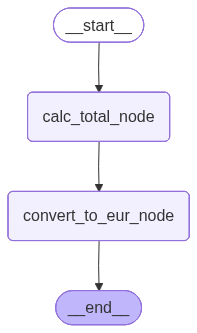

In [4]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
graph.invoke({'amount_usd': 24000})


{'amount_usd': 24000, 'total_usd': 25920.0, 'total_eur': 22291.2}